In [38]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Define simulation parameters

# Define Hilbert space dimensions
N_cavity = 5  # Cavity dimension (number of Fock states)
N_qubit = 2  # Qubit dimension
# Define identity operatos
I_c = qt.qeye(N_cavity)  # Cavity identity operator
I_q = qt.qeye(N_qubit)  # Qubit identity operator
# Create the annihilation operator for the cavity
d = qt.tensor(qt.destroy(N_cavity), I_q)
# Define qubit operators
sigma_x = qt.tensor(I_c, qt.sigmax())  # Qubit X operator
sigma_z = qt.tensor(I_c, qt.sigmaz())  # Qubit Z operator
sigma_plus = qt.tensor(I_c, qt.create(N_qubit))  # Qubit raising operator
sigma_minus = qt.tensor(I_c, qt.destroy(N_qubit))  # Qubit lowering operator
# Define initial state
psi0_cavity = qt.basis(N_cavity, 0)  # Cavity ground state
psi0_qubit =  qt.basis(N_qubit, 0)  # Qubit |0⟩ state
psi0 = qt.tensor(psi0_cavity, psi0_qubit)  # Initial state of the composite system
# Define time points for evolution
t_range = np.linspace(0, 10000, 400)  # Zeit in ns
# Master equation solver options
options = options = dict(
    store_states=True,
    progress_bar=True,
    nsteps=int(1e6),
    rtol=1e-4,
    atol=1e-4,
    max_step=1.0,
)

In [40]:
# Simulate displaced cavity
n_range = np.logspace(-3, 1, num=10)

def solve_master_equation(n):
    # Define parameters
    omega_c = 2 * np.pi * 6.826  # Cavity frequency (nu_c = 6.826 GHz)
    omega_q = 2 * np.pi * 5.0258  # Qubit frequency (nu_q = 5.0258 GHz)
    kappa = 2 * np.pi * 4.3e-3  # Dissipation rate (kappa / 2 pi = 4.3 MHz)

    Delta = omega_q - omega_c
    g = np.sqrt(2 * np.pi * 0.66e-3) * Delta # Coupelling strength
    epsilon_r = -2 * np.pi * 9e-3 / 2 / g * Delta  # Rabi drive amplitude

    # ac Stark shift
    chi = -g**2 / Delta  # (chi / 2 pi = -0.66 MHz)
    omega_q_ac = omega_q + 2 * chi * n
    
    omega_r = omega_q_ac  # Qubit drive frequency (near qubit frequency)
    omega_d = omega_c - 2 * np.pi * 9e-3  # (Delta_c / 2 pi = -9 MHz)

    Delta_c = omega_d - omega_c  # (Delta_c / 2 pi = -9 MHz)
    Delta_q = omega_q - omega_r
    Omega_R = - 2 * epsilon_r * g / Delta

    epsilon_d = np.sqrt(n) * np.abs(Delta_c + 0.5j * kappa)  # Cavity drive amplitude
    alpha = epsilon_d / (Delta_c + 0.5j * kappa)

    # Define cooling rates
    T_1 = 10e3  # (T_1 = 10 μs)
    T_2 = 10.6e3  # Qubit lab frame dephasing rate (T_2 = 10.6 μs)
    T_phi = 2 * T_1  # Qubit pure dephasing time
    Gamma_phi = 1 / T_phi  # Qubit pure dephasing rate
    Gamma_plus = 4 * chi**2 * n / kappa + (1 / (2 * T_2))
    Gamma_minus = kappa * chi**2 * n / ((2 * Omega_R)**2 + (kappa / 2)**2) + (1 / (2 * T_2))
    
    # Define collapse operators
    c_ops = [
        np.sqrt(kappa) * d,
        np.sqrt(Gamma_phi / 2) * sigma_z,
        np.sqrt(Gamma_plus) * sigma_plus,
        np.sqrt(Gamma_minus) * sigma_minus,
        ]
    
    # Define the displaced Hamiltonian
    H_c = -Delta_c * d.dag() * d
    H_q = -(Delta_q + chi * (2 * n)) / 2 * sigma_z
    H_R = -Omega_R / 2 * sigma_x
    H_chi = -chi * (np.conj(alpha) * d + alpha * d.dag() + d.dag() * d) * sigma_z
    H = H_c + H_q + H_R + H_chi

    # # Define the Hamiltonian w/out displacement
    # H_c = -Delta_c * d.dag() * d
    # H_q = -(Delta_q + chi)/ 2 * sigma_z
    # H_R = -Omega_R / 2 * sigma_x
    # H_chi = -chi * d.dag() * d * sigma_z
    # H_d = epsilon_d * (d.dag() + d)
    # H = H_c + H_q + H_R + H_chi + H_d

    return qt.mesolve(H, psi0, t_range, c_ops, options=options)

# Solve the master equations
results = qt.parallel_map(solve_master_equation, n_range)

10.0%. Run time:   0.03s. Est. time left: 00:00:00:0010.0%. Run time:   0.03s. Est. time left: 00:00:00:0010.0%. Run time:   0.03s. Est. time left: 00:00:00:0010.0%. Run time:   0.03s. Est. time left: 00:00:00:00



20.1%. Run time:   0.19s. Est. time left: 00:00:00:00
20.1%. Run time:   0.20s. Est. time left: 00:00:00:00
20.1%. Run time:   0.20s. Est. time left: 00:00:00:0020.1%. Run time:   0.20s. Est. time left: 00:00:00:00

30.1%. Run time:   0.22s. Est. time left: 00:00:00:00
40.1%. Run time:   0.25s. Est. time left: 00:00:00:00
30.1%. Run time:   0.26s. Est. time left: 00:00:00:00
30.1%. Run time:   0.27s. Est. time left: 00:00:00:00
30.1%. Run time:   0.28s. Est. time left: 00:00:00:00
50.1%. Run time:   0.33s. Est. time left: 00:00:00:0040.1%. Run time:   0.33s. Est. time left: 00:00:00:00

40.1%. Run time:   0.34s. Est. time left: 00:00:00:0040.1%. Run time:   0.34s. Est. time left: 00:00:00:00

60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
50.1%. Run time:   0.39s. Es

In [41]:
# Get expectation values

results_states = [result.states for result in results]

n_exps = np.array([[qt.expect(d.dag() * d, state) for state in result_states] for result_states in results_states])
x_exp = np.array([qt.expect(sigma_x, result_states[-1]) for result_states in results_states])
z_exp = np.array([qt.expect(sigma_z, result_states[-1]) for result_states in results_states])

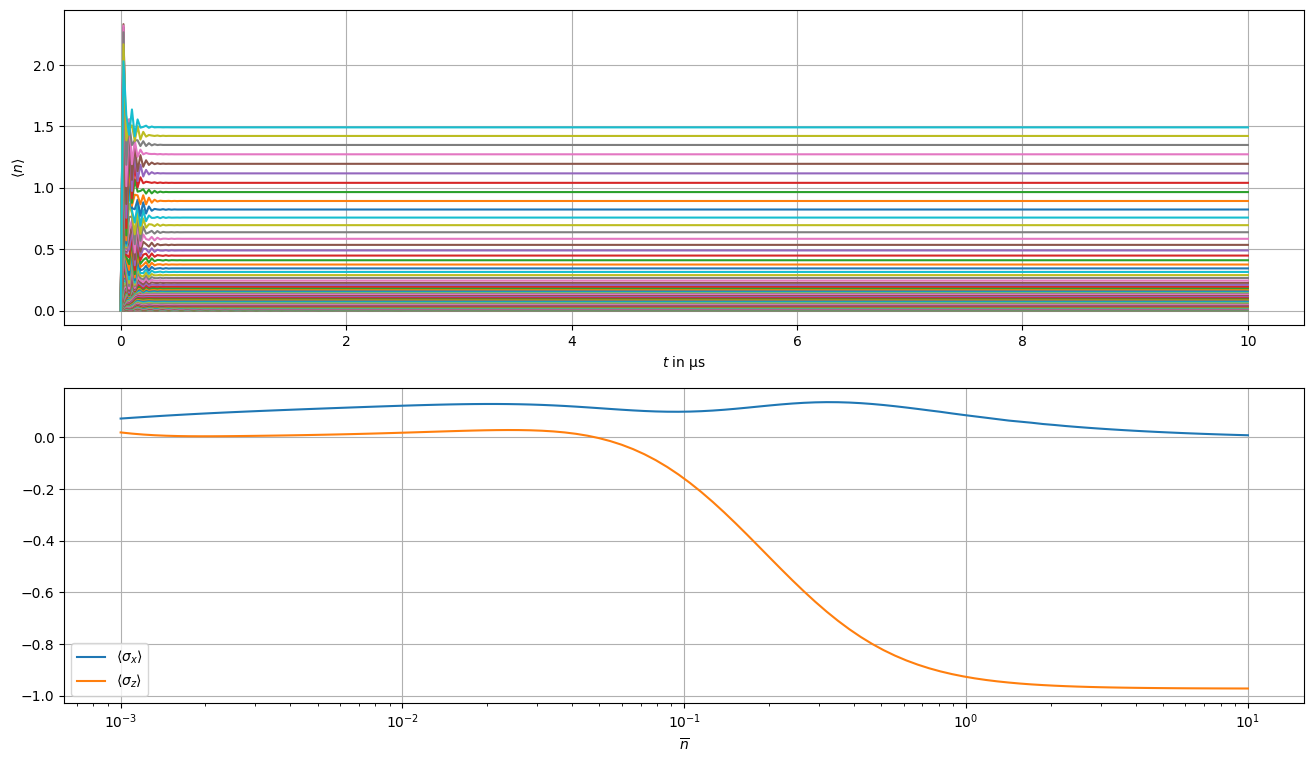

In [42]:
# Plot the results

fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for n, n_exp in list(zip(n_range, n_exps)):
    ax1.plot(t_range * 1e-3, n_exp, label=n)  # Display time in μs
ax2.plot(n_range, x_exp, label='$\\langle \\sigma_x \\rangle$')
ax2.plot(n_range, z_exp, label='$\\langle \\sigma_z \\rangle$')

ax1.set_xlabel('$t$ in μs')
ax1.set_ylabel('$\\langle n \\rangle$')
ax1.grid()
# ax1.legend()

ax2.set_xlabel('$\\overline{n}$')
ax2.grid()
ax2.set_xscale('log')
ax2.legend()

plt.show()